# 查看数据

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('input/train.csv', index_col=0)
test_df = pd.read_csv('input/test.csv', index_col=0)

In [5]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# 提取训练样本和训练label

In [85]:
train_x=train_df.drop('SalePrice',axis=1)
train_y=train_df['SalePrice']
train_x.shape

(1460, 79)

# 合并训练样本和测试样本
这里的合并是为了将训练样本和测试样本一起做数据预处理以及特征工程

其实这里我有一个疑问，将训练样本和测试样本一起做预处理，比如归一化等等，是否会将测试样本中的信息带入到训练样本中，从而导致类似于‘用测试样本训练’的问题。

不过其实想想测试样本也没有label，光靠这样学不到什么东西，因此也就没有关系了。

## train_y向正态分布转化
**先处理train_y,让它尽可能的符合正态分布**

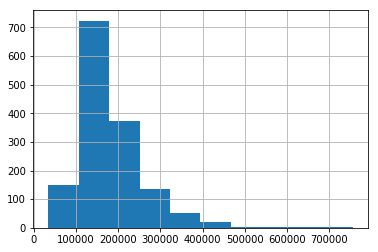

In [21]:
%matplotlib inline
train_y.hist()

**利用log(value+1),让其符合正太分布**

In [25]:
train_y_log=pd.DataFrame({'logp1':np.log1p(train_y)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109c6f400>]], dtype=object)

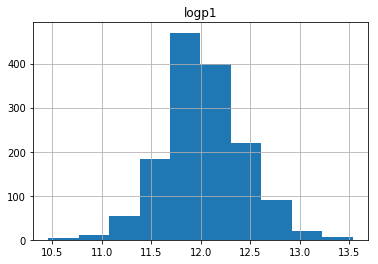

In [26]:
%matplotlib inline
train_y_log.hist()

至于为什么说要把结果转化成符合正态分布的情况，我觉得下面这篇文章应该有讲，但是不想看啊………………

http://assets.cambridge.org/97805217/60119/excerpt/9780521760119_excerpt.pdf

还有这个quora：

https://www.quora.com/How-does-skewness-impact-regression-model

里面说会影响参数估计和置信区间，呃，统计学的不好，= - 

## 训练样本和测试样本的数据预处理

### 数据合并

In [49]:
all_df=pd.concat([train_x,test_df])
all_df.shape

(2919, 79)

### 处理用numerical变量表示的category特征
pandas的dataframe中，有很多特征是用数字来表示的，但它其实表示的是一些类别，最简单的比如是0~6分别表示周一到周日。

对于这些量，我们需要将其从数字量（numerical）转化为字符串(string)，才能让pandas识别他为category量。

那么哪些量，它表面上是numerical量，但实际上是category量呢，光靠看是看不出来的，这个时候就要看数据说明了！！！

看了数据说明，我们发现，其中有三个特征是用numerical量来表示category的：

    MSSubClass
    OverallQual
    OverallCond

In [34]:
all_df[['MSSubClass','OverallQual','OverallCond']].head()

,MSSubClass,OverallQual,OverallCond
Id,,,
1,60,7,5
2,20,6,8
3,60,7,5
4,70,7,5
5,60,8,5


In [53]:
all_df['MSSubClass']=all_df['MSSubClass'].astype('str')
all_df['OverallQual']=all_df['OverallQual'].astype('str')
all_df['OverallCond']=all_df['OverallCond'].astype('str')

In [37]:
all_df.MSSubClass.value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

### 对Category特征进行编码
在最后将样本输入到模型时，我们要求数据都是数字型的。

而对于category类的特征，我们通常使用one_hot编码来实现。

pandas提供了方便的包来完成这个任务。

当我们用numerical来表达categorical的时候，要注意，数字本身有大小的含义，所以乱用数字会给之后的模型学习带来麻烦。于是我们可以用One-Hot的方法来表达category。

pandas自带的get_dummies方法，可以帮你一键做到One-Hot。（下面那个就是哑变量了）

In [54]:
pd.get_dummies(all_df['MSSubClass'],prefix='MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


**上面只是演示，下面就把所有的category量给one-hot了**

In [58]:
all_dummy=pd.get_dummies(all_df)
all_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,...,0,0,0,1,0,0,0,0,1,0


### 对numerical数据进行填补
在numerical数据中，最麻烦的是会有很多Nan数据。

当某一个特征中的Nan量很多的时候，可以考虑丢弃这个特征；
当某一个特征中的Nan量适中，不算很少的时候，可以考虑把这个Nan作为一个独立的类别处理；
当某一个特征中的Nan量比较少的时候，可以用0值，或者这一列的均值来填补的方法完成。

**查看每一列中的null数据**

In [59]:
all_dummy.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtUnfSF         1
GarageArea        1
TotalBsmtSF       1
GarageCars        1
BsmtFinSF2        1
dtype: int64

**这里我们简单一点，每一列null值都用列均值填充**

In [60]:
col_mean=all_dummy.mean()
col_mean.shape

(320,)

In [62]:
all_dummy=all_dummy.fillna(col_mean)
all_dummy.isnull().sum().sort_values(ascending=False).head(10)

SaleCondition_Partial    0
SaleCondition_Normal     0
Condition1_Artery        0
Condition1_Feedr         0
Condition1_Norm          0
Condition1_PosA          0
Condition1_PosN          0
Condition1_RRAe          0
Condition1_RRAn          0
Condition1_RRNe          0
dtype: int64

### 对numerical数据进行归一化
不同特征的数据其取值范围不同，如果不归一化的话，会导致收敛很慢，甚至无法收敛的情况。

归一化有这么几种操作：

    1. 比例归一化，（x-xmin)/(xmax-xmin)
    2. 标准分布归一化，(x-xmean)/xstd

下面我们就用标准分布归一化，这样特征的均值就是0，方差就是1了.

另外注意，category转化成的one-hot编码特征列，虽然现在也是数字类型，但是不用进行归一化。

因此，我们需要提取出仅仅是numerical类型的数据。

In [64]:
# 注意这里是从one_hot编码前的dataframe中获取数据。
numerical_cols=all_df.columns[all_df.dtypes != 'object']
numerical_cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

**获得numerical列的均值和方差**

In [74]:
numerical_mean=all_dummy.loc[:,numerical_cols].mean()
numerical_std=all_dummy.loc[:,numerical_cols].std()
numerical_mean

LotFrontage        -3.411651
LotArea            -1.289389
YearBuilt         -67.297536
YearRemodAdd      -99.729196
MasVnrArea         -0.575373
BsmtFinSF1         -0.971158
BsmtFinSF2         -0.294822
BsmtUnfSF          -1.278934
TotalBsmtSF        -2.392085
1stFlrSF           -2.962938
2ndFlrSF           -0.786726
LowQualFinSF       -0.103407
GrLivArea          -2.971501
BsmtFullBath       -5.360308
BsmtHalfBath       -5.409223
FullBath          -17.237072
HalfBath           -5.250257
BedroomAbvGr      -12.839346
KitchenAbvGr     -133.475003
TotRmsAbvGrd       -8.399392
Fireplaces         -4.568073
GarageYrBlt       -82.872654
GarageCars         -9.367284
GarageArea         -2.206005
WoodDeckSF         -0.746533
OpenPorchSF        -0.713275
EnclosedPorch      -0.365223
3SsnPorch          -0.107577
ScreenPorch        -0.291065
PoolArea           -0.064959
MiscVal            -0.089735
MoSold             -3.442199
YrSold          -3571.069246
dtype: float64

**进行归一化**

In [75]:
all_dummy.loc[:,numerical_cols]=(all_dummy.loc[:,numerical_cols]-numerical_mean)/numerical_std
all_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202033,-0.219943,1.046078,0.896679,0.525112,0.580808,-0.29308,-0.934702,-0.444252,-0.773728,...,0,0,0,1,0,0,0,0,1,0
2,0.501785,-0.074186,0.154737,-0.395536,-0.572152,1.177911,-0.29308,-0.629788,0.477029,0.261030,...,0,0,0,1,0,0,0,0,1,0
3,-0.061269,0.134973,0.980053,0.848819,0.334770,0.097857,-0.29308,-0.288467,-0.299025,-0.610614,...,0,0,0,1,0,0,0,0,1,0
4,-0.436639,-0.080613,-1.859033,-0.682695,-0.572152,-0.494855,-0.29308,-0.047266,-0.671168,-0.506118,...,0,0,0,1,1,0,0,0,0,0
5,0.689469,0.516578,0.947040,0.753100,1.387248,0.468851,-0.29308,-0.161040,0.211537,-0.037164,...,0,0,0,1,0,0,0,0,1,0


In [77]:
all_dummy['YearRemodAdd'].mean()

7.56043376453917e-09

In [78]:
all_dummy.shape

(2919, 320)

# 训练模型
接下来就是训练模型的时间了。

目前由于是regression问题，我们这里选用几个简单的回归模型来尝试。

**训练数据和测试数据分开**
由于之前一起做预处理的，现在需要把训练数据和测试数据分开。

In [94]:
train_x_dummy=all_dummy.iloc[:train_x.shape[0]]
test_x_dummy=all_dummy.iloc[train_x.shape[0]:]
train_x_dummy.shape
test_x_dummy.shape

(1459, 320)

In [90]:
train_y_dummy=pd.DataFrame(train_y_log)
train_y_dummy.shape

(1460, 1)

## 简单线性模型训练
接下来，就用linearregression，lasso(L1正则化),ridge(L2正则化），来进行训练。

### LinearRegression

In [95]:
from sklearn.linear_model import LinearRegression

LinearRegression就是简单的线性回归，默认是可以训练结局的，并且没有什么超参数需要调。

In [103]:
model_lr=LinearRegression()
model_lr.fit(train_x_dummy,train_y_dummy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [180]:
result_lr=model_lr.predict(test_x_dummy)
result_lr[:5]

(1459, 1)

### Lasso（L1正则化）

In [102]:
from sklearn.linear_model import LassoCV

**Lasso是添加了L1正则化的线性回归器，这里的LassoCV是自带的crossvalidation，来帮助我们选择最优的惩罚因子**

In [117]:
model_la=LassoCV()
model_la.fit(train_x_dummy,train_y_dummy['logp1'])

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

**这里展示是从哪些alpha值中来进行挑选的（crossValidation）**

In [118]:
model_la.alphas_

array([ 0.29053539,  0.27095427,  0.25269286,  0.23566221,  0.21977936,
        0.20496697,  0.19115288,  0.17826982,  0.16625503,  0.15505   ,
        0.14460015,  0.13485458,  0.12576583,  0.11728964,  0.10938471,
        0.10201254,  0.09513724,  0.08872531,  0.08274552,  0.07716875,
        0.07196783,  0.06711744,  0.06259395,  0.05837533,  0.05444103,
        0.05077188,  0.04735003,  0.0441588 ,  0.04118264,  0.03840707,
        0.03581856,  0.03340451,  0.03115316,  0.02905354,  0.02709543,
        0.02526929,  0.02356622,  0.02197794,  0.0204967 ,  0.01911529,
        0.01782698,  0.0166255 ,  0.015505  ,  0.01446001,  0.01348546,
        0.01257658,  0.01172896,  0.01093847,  0.01020125,  0.00951372,
        0.00887253,  0.00827455,  0.00771687,  0.00719678,  0.00671174,
        0.0062594 ,  0.00583753,  0.0054441 ,  0.00507719,  0.004735  ,
        0.00441588,  0.00411826,  0.00384071,  0.00358186,  0.00334045,
        0.00311532,  0.00290535,  0.00270954,  0.00252693,  0.00

**每个alpha对应的得分**

这里之所以是100*3的样子，是lasso自带的这个cross_validation用了fold=3的验证。

In [119]:
model_la.mse_path_.shape

(100, 3)

**最优alpha**

In [120]:
model_la.alpha_

0.00038407068167655573

**开始预测吧**

In [182]:
result_la=model_la.predict(test_x_dummy)
result_la[:5]

array([ 11.68723327,  11.91061966,  12.10780565,  12.20183779,  12.18259235])

### Ridge正则化
Ridge就是L2正则化啦，L1和L2从公式上的区别就是一个是绝对值，一个是平方；

那么从结果上而言，L1可以把某些特征的权重惩罚到0，而L2只能惩罚到很小，却到不了0.

In [123]:
from sklearn.linear_model import Ridge

**这里我们就不依赖库提供的方法，自己来写一下cross_validation**

查了下源代码，发现需要调整的参数也就只有惩罚参数alpha而已。

那么需要我们定义的内容有：

    1. alpha的候选列表。
    2. 评价函数，如何判断不同模型的好坏。
    # 这里我们选中r2值来评价，最好是1，差的可能到负数。

**准备alpha列表，这里是从0~0.3的100个数**

In [131]:
pre_alphas=np.linspace(0,0.3,100)
pre_alphas.shape

(100,)

**将不同的alpha带入，开始fit，并采用r2来进行评分**

In [132]:
results_dic={}
for test_alpha in pre_alphas:
    model_rd=Ridge(alpha=test_alpha)
    model_rd.fit(train_x_dummy,train_y_dummy)
    score=model_rd.score(X=train_x_dummy,y=train_y_dummy)
    results_dic[test_alpha]=score

**可视化结果，纵坐标是r2值，横坐标是alpha的值**

从图中可以发现，还是在最开始的0.00~0.03之间的时候，r2值最高。

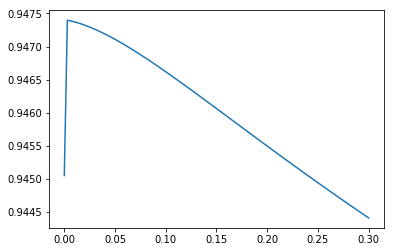

In [140]:
%matplotlib inline
plt.plot(results_dic.keys(),results_dic.values())
plt.show()

**对结果排序，取到最高值**

In [149]:
results_dic_sorted=sorted(results_dic.items(),key=lambda item:item[1])
best_alpha_rd=results_dic_sorted[-1][1]
results_dic_sorted[-1]

(0.0030303030303030303, 0.94739777078506349)

## Ensemble

集成算法算是能够在不过拟合的情况下，对性能进行进一步的提升。

这里我们用简单的stacking来做一个ensemble。

对于stacking而言，就是将不同回归器的值，作为输入，输入到一个模型中，然后将这个模型的输出作为最终结果。

比如，两个模型，一个回归预测为1，一个回归预测为2，那么stacking最终结果可以是求个均值（1+2）/2=1.5

这里我们也这么做吧。

**获得不同的回归器的结果**

In [152]:
result_lr=model_lr.predict(test_x_dummy)
result_la=model_la.predict(test_x_dummy)

model_rd=Ridge(alpha=best_alpha_rd)
model_rd.fit(train_x_dummy,train_y_dummy)
result_rd=model.predict(test_x_dummy)


array([[ 11.69952393],
       [ 12.1229248 ],
       [ 12.12243652],
       ..., 
       [ 12.08950806],
       [ 11.63433838],
       [ 12.29608154]])

**将结果变换回去**

记得之前我们对y值做了个一个log嘛，现在在做最终的stacking之前，需要将这个结果给变回去。

还好，numpy提供了简单的方法帮我们做这个事。

In [188]:
result_lr_y=np.expm1(result_lr)[:,0]
result_la_y=np.expm1(result_la)
result_rd_y=np.expm1(result_rd)[:,0]

/Users/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in expm1
  """Entry point for launching an IPython kernel.
/Users/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in expm1
  This is separate from the ipykernel package so we can avoid doing imports until


<font color='red'>**上面的红字其实是有一个问题，即，对于还未转化的预测结果y，如果y值太大了，会导致转化后的结果超出上限，变为inf.

下面的图和下面那个max()，就是表现出了这个问题。

嘛，这个问题暂时先不管，后面优化在继续吧。**</font>

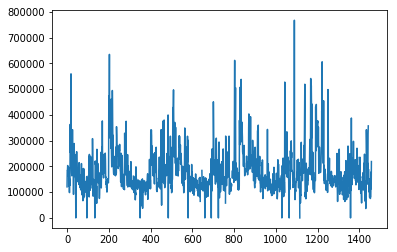

In [206]:
%matplotlib inline
plt.plot(range(0,len(result_rd_y)),result_rd_y)
plt.show()

In [205]:
result_rd_y.max()

inf

**用均值来表示stacking**

In [192]:
result_rd_y.shape

(1459,)

## 编辑提交结果

**计算均值**

In [194]:
result_final=(result_la_y+result_lr_y+result_rd_y)/3
result_final.shape

(1459,)

**这里面有inf的值，需要把inf的值处理一下**

这里用SalePrice的最大值来替代inf值

In [229]:
result_final_df=pd.DataFrame(data={'Id':test_df.index,'SalePrice':result_final})
result_final_df.SalePrice=result_final_df.SalePrice.replace(np.inf,-1)
result_final_df.SalePrice=result_final_df.SalePrice.replace(-1,result_final_df.SalePrice.max())

**构造提交结果**

In [230]:
submission_df=result_final_df.copy()

**创建csv文件，保存到本地**

In [231]:
submission_df.to_csv('house_pricing.csv',index=False)

In [232]:
submission_df.to_csv('house_pricing2.csv')